In [ ]:
# 评价标准 

In [13]:
import numpy as np
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

# 准确率 accuracy=(TP+TN)/(TP+TN+FP+FN)
y_pred, y_true = [0, 2, 1, 3], [0, 1, 2, 3]
print('compute_accuracy:', accuracy_score(y_true, y_pred))
print('compute_accuracy:', accuracy_score(y_true, y_pred, normalize=False))  # normalize默认为false，为true时，返回分类正确的样本数量

# 精确率 precision=TP/(TP+FP)
y_true, y_pred = [0, 1, 2, 0, 1, 2], [0, 2, 1, 0, 0, 1]
# Macro在计算均值时使每个类别具有相同的权重，最后结果是每个类别的指标的算术平均值
print('compute_precision:', precision_score(y_true, y_pred, average='macro'))
# micro在计算均值时给每个类别下的每个样本相同的权重，将所有样本合在一起计算各个指标
print('compute_precision:', precision_score(y_true, y_pred, average='micro'))
print('compute_precision:', precision_score(y_true, y_pred, average='weighted'))
# 当average参数为None时，得到的结果是每个类别的precision
print('compute_precision:', precision_score(y_true, y_pred, average=None))

# 召回率
y_true, y_pred = [0, 1, 2, 0, 1, 2], [0, 2, 1, 0, 0, 1]
print('compute_recall:', recall_score(y_true, y_pred, average='macro'))
print('compute_recall:', recall_score(y_true, y_pred, average='micro'))
print('compute_recall:', recall_score(y_true, y_pred, average='weighted'))
print('compute_recall:', recall_score(y_true, y_pred, average=None))

# P-R曲线，精准率precision和召回率recall曲线，以recall作为横坐标轴，precision作为纵坐标轴，主要是针对二分类
y_true, y_scores = np.array([0, 0, 1, 1]), np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print("precision_recall_curve:", precision, recall, thresholds)

# F1 = 2 * (precision * recall) / (precision + recall)
y_true, y_pred = [0, 1, 2, 0, 1, 2], [0, 2, 1, 0, 0, 1]
print('compute_f1_score:', f1_score(y_true, y_pred, average='macro'))  # 0.26666666666666666
print('compute_f1_score:', f1_score(y_true, y_pred, average='micro'))  # 0.3333333333333333
print('compute_f1_score:', f1_score(y_true, y_pred, average='weighted'))  # 0.26666666666666666
print('compute_f1_score:', f1_score(y_true, y_pred, average=None))  # [0.8 0.  0. ]

# NDCG
def DCG(label_list):
    dcgsum = 0
    for i in range(len(label_list)):
        dcg = (2 ** label_list[i] - 1) / np.math.log(i + 2, 2)
        dcgsum += dcg
    return dcgsum
def NDCG(label_list):
    dcg = DCG(label_list)
    ideal_list = sorted(label_list, reverse=True)
    ideal_dcg = DCG(ideal_list)
    if ideal_dcg == 0:
        return 0
    return dcg / ideal_dcg
print('NDCG:', NDCG([1,0,0,1]))

# 基尼系数
import numpy as np
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
def gini_norm(actual, pred):
    return gini(actual, pred) / gini(actual, actual)
y_true, y_pred = np.array([0.1, 0.2, 0.2, 0, 0.1, 0.2]), np.array([0.3, 0.2, 0.1, 0.2, 0.4, 0.1])
print('GINI:', gini_norm(y_true, y_pred))

compute_accuracy: 0.5
compute_accuracy: 2
compute_precision: 0.2222222222222222
compute_precision: 0.3333333333333333
compute_precision: 0.2222222222222222
compute_precision: [0.66666667 0.         0.        ]
compute_recall: 0.3333333333333333
compute_recall: 0.3333333333333333
compute_recall: 0.3333333333333333
compute_recall: [1. 0. 0.]
precision_recall_curve: [0.66666667 0.5        1.         1.        ] [1.  0.5 0.5 0. ] [0.35 0.4  0.8 ]
compute_f1_score: 0.26666666666666666
compute_f1_score: 0.3333333333333333
compute_f1_score: 0.26666666666666666
compute_f1_score: [0.8 0.  0. ]
NDCG: 0.8772153153380494
GINI: -0.42857142857142855


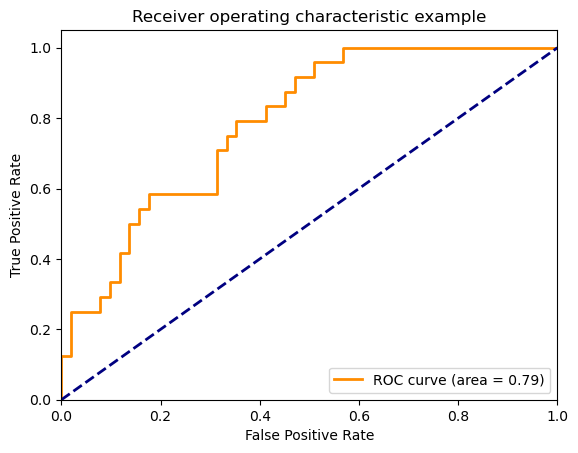

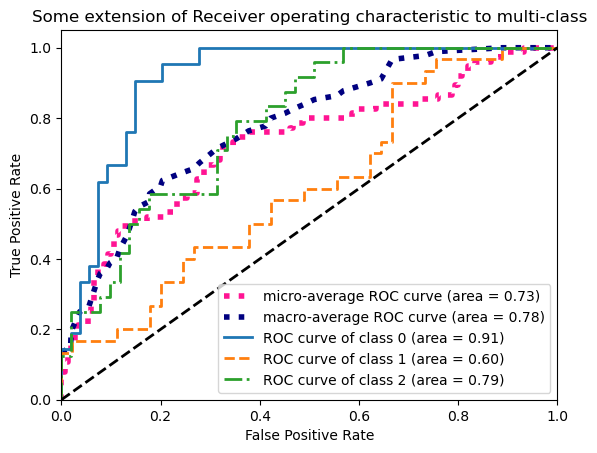

In [14]:
# 结果画图

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle

def plot_roc_binary_class():
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show();

def plot_roc_multi_class():
    # 计算微平均ROC曲线和AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # 计算宏平均ROC曲线和AUC
    # 首先汇总所有FPR
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # 然后再用这些点对ROC曲线进行插值
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    # 最后求平均并计算AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    # 绘制所有ROC曲线
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]), color='navy', linestyle=':', linewidth=4)
    linestyle = cycle(['solid', 'dashed', 'dashdot'])
    for i, linestyle in zip(range(n_classes), linestyle):
        plt.plot(fpr[i], tpr[i], linestyle=linestyle, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show();

if __name__=="__main__":
    # 导入鸢尾花数据集
    iris = datasets.load_iris()
    X = iris.data  # X.shape==(150, 4)
    y = iris.target  # y.shape==(150, )
    # 二进制化输出
    y = label_binarize(y, classes=[0, 1, 2])  # shape==(150, 3)
    n_classes = y.shape[1]  # n_classes==3
    # 添加噪音特征，使问题更困难
    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape  # n_samples==150, n_features==4
    X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]  # shape==(150, 84)
    # 打乱数据集并切分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
    # 学习区分某个类与其他的类
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # y_score.shape==(75, 3)
    # 为每个类别计算ROC曲线和AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plot_roc_binary_class()
    plot_roc_multi_class()
